<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/3rdWeekTasks/Decision%20Tree_on%20Credit%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 3 : Classification model: Decision Tree dengan Explore matriks evaluasi pada model klasifikasi (Akurasi,Presisi,Recall,F1,AUC,ROC,etc)

Dataset : CreditDataset.csv

Dokumentasi Chat GPT : [Link](https://chatgpt.com/share/670f77d8-4f74-8005-9181-ef4bcd32dfd1)

Prompt : Beri kode untuk connect gcolab dengan gdrive!



In [2]:
from google.colab import drive

# Mount Google Drive ke Colab
drive.mount('/content/drive')


Mounted at /content/drive


Prompt: Beri kode untuk read dataset sebagai dataframe!



In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Baca dataset CSV
df = pd.read_csv('/content/drive/MyDrive/Dataset/CreditDataset.csv')

# Tampilkan beberapa baris awal
print(df.head())


    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


Prompt: beri kode untuk Explore matriks evaluasi pada model klasifikasi (Akurasi)!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


Prompt : saya mempunyai data dengan output df.head dan df.info seperti diatas,
buatlah Classification model: Decision Tree, lalu Explore matriks evaluasi pada model klasifikasi (Akurasi,Presisi,Recall,F1,AUC,ROC,etc)

In [30]:
#2: Load dan Persiapan Data
# Pisahkan fitur dan label
X = df.drop('Class', axis=1)  # Semua kolom kecuali 'Class'
y = df['Class']  # Kolom target

# Pisahkan data menjadi Training dan Testing (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#3: Pra-pemrosesan Data
for col in X.columns:
    if X[col].dtype == 'object':
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col])
        X_train[col] = encoder.transform(X_train[col])
        X_test[col] = encoder.transform(X_test[col])

In [32]:
#4: Membangun dan Melatih Model Decision Tree
# Inisialisasi model
clf = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
clf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1 untuk ROC/AUC

In [33]:
#5: Evaluasi Model
#1. Akurasi, Presisi, Recall, dan F1-Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.73
Precision: 0.7124855576951563
Recall: 0.73
F1 Score: 0.7160718515594158

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.41      0.47        59
           1       0.78      0.87      0.82       141

    accuracy                           0.73       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.71      0.73      0.72       200



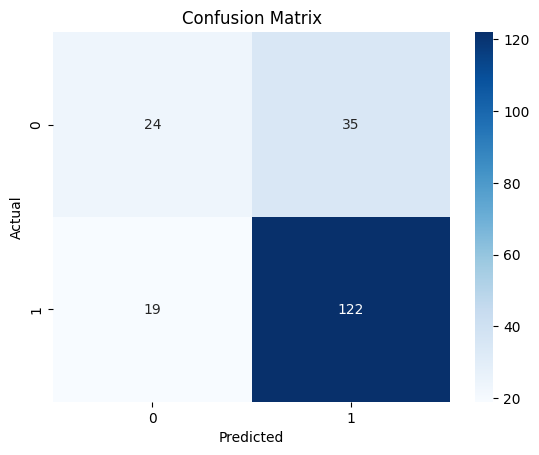

In [34]:
#2. Confusion Matrix
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

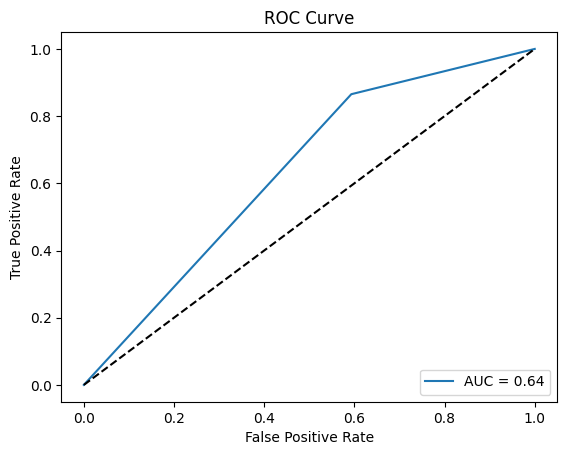

AUC Score: 0.636013943983652


In [35]:
#3. ROC Curve dan AUC Score
# Hitung ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)